### El problema TSP

En el campo matemático de la teoría de grafos, un grafo completo es un grafo simple no dirigido en el que cada par de vértices distintos está conectado por una única arista. 

La librería `dwave_networkx` proporciona un algoritmo TSP, `traveling_salesperson()`, que resuelve el clásico problema del viajante o tsp, pasándole como argumento un grafo completo, con pesos no nulos.

El problema se aborda mediante el formalismo qubo, intentando encontrar el estado fundamental de la función de coste. Por la naturaleza de un solver (evolución adiabática no garantizada), la solución puede no corresponder al estado de mínima energía, pero sí es esperable que en todo caso se le aproxime.

Se puede introducir en el formalismo multiplicador de Lagrange para penalizar la violación de su restricción fundamental: no visitar un nodo más de una vez. En caso contrario se priorizará la obtención de un valor mínimo, es decir, de una distancia total recorrida mínima.


https://docs.ocean.dwavesys.com/projects/dwave-networkx/en/latest/reference/algorithms/generated/dwave_networkx.algorithms.tsp.traveling_salesperson.html

Limitaciones y sugerencias:

https://medium.com/@michal.stechly/solving-the-traveling-salesman-problem-using-quantum-computer-bb00438de223

https://support.dwavesys.com/hc/en-us/community/posts/360028972434

#### TSP capitales gallegas

Se trata de minimizar el quilometraje de un viajante de comercio que ha de visitar (a ser posible una única vez) las 4 capitales gallegas + Vigo, y con los siguientes considerandos:

a) partiendo desde la ciudad más ventajosa

b) partiendo de una ciudad concreta.

- Nodo 0: Coruña
- Nodo 1: Lugo
- Nodo 2: Orense
- Nodo 3: Pontevedra
- Nodo 4: Vigo


Distancias nodales usando vías principales:

- 0-1: 100
- 0-2: 175
- 0-3: 125
- 1-2: 110
- 1-3: 145
- 2-3: 116
- 2-4: 100
- 3-4: 25


In [1]:
#Entorno y funciones auxiliares

import dimod
import networkx as nx
import matplotlib.pyplot as plt
import dwave_networkx as dnx


def grafo_tsp(nodos):
    G = nx.Graph()
    G.add_weighted_edges_from(nodos)

    pos = nx.spring_layout(G,seed=15)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx(G, pos, width=1, linewidths=1,
    node_size=800, alpha=0.6,with_labels=True)

    nx.draw_networkx_edge_labels(G,pos,font_color='red',edge_labels=labels)

    plt.show()
    return G


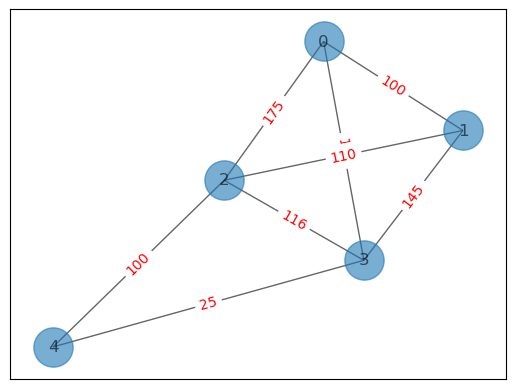

In [2]:
# Definición del problema TSP

nodos_tsp={(0, 1, 100), (0, 3, 125),(0, 2, 175), 
           (1, 2, 110),(1, 3, 145),
           (2, 3, 116),(2, 4, 100),
           (3, 4, 25)}


gTSP=grafo_tsp(nodos_tsp)

In [3]:
# Con nodo de inicio arbitrario

dnx.traveling_salesperson(gTSP, dimod.ExactSolver()) 


[0, 3, 4, 2, 1]

In [37]:
# Con nodo de inicio fijo: ej. Lugo

dnx.traveling_salesperson(gTSP,dimod.ExactSolver(),start=1) 

[1, 0, 3, 4, 2]

In [5]:
# Con QSampler

from dwave.system import DWaveSampler
from dwave.system import EmbeddingComposite

d_sampler=EmbeddingComposite(DWaveSampler())
dnx.traveling_salesperson(gTSP,d_sampler,start=1) 

[1, 3, 4, 4, 2]

In [6]:
# Con QSampler específico

sampler = EmbeddingComposite(DWaveSampler(solver = "DW_2000Q_6"))
dnx.traveling_salesperson(gTSP,d_sampler,start=1) 

[1, 0, 2, 4, None]